# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


In [25]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip; unzip -o abalone.zip; rm abalone.zip

--2025-12-22 11:57:31--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [ <=>                ]  54.06K  --.-KB/s    in 0.05s   

2025-12-22 11:57:31 (999 KB/s) - ‘abalone.zip’ saved [55357]

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [69]:
df = pd.read_csv('../abalone.data', header=None, names=[
    'sex',
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings',
])

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [27]:
df.head()

,sex,length,diameter,height,whole_weight,shucked weight,viscera weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [29]:
df.describe()

,length,diameter,height,whole_weight,shucked weight,viscera weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


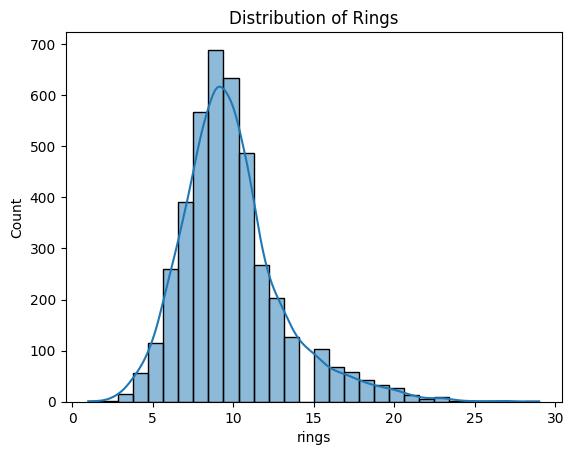

In [33]:
sns.histplot(df['rings'], bins=30, kde=True)
plt.title('Distribution of Rings')
plt.show()

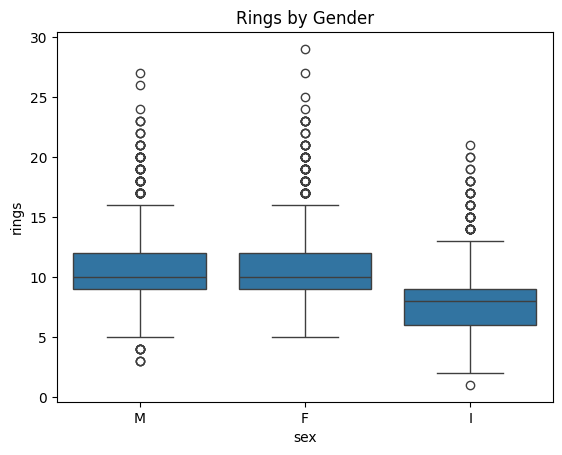

In [35]:
sns.boxplot(x='sex', y='rings', data=df)
plt.title('Rings by Gender')
plt.show()

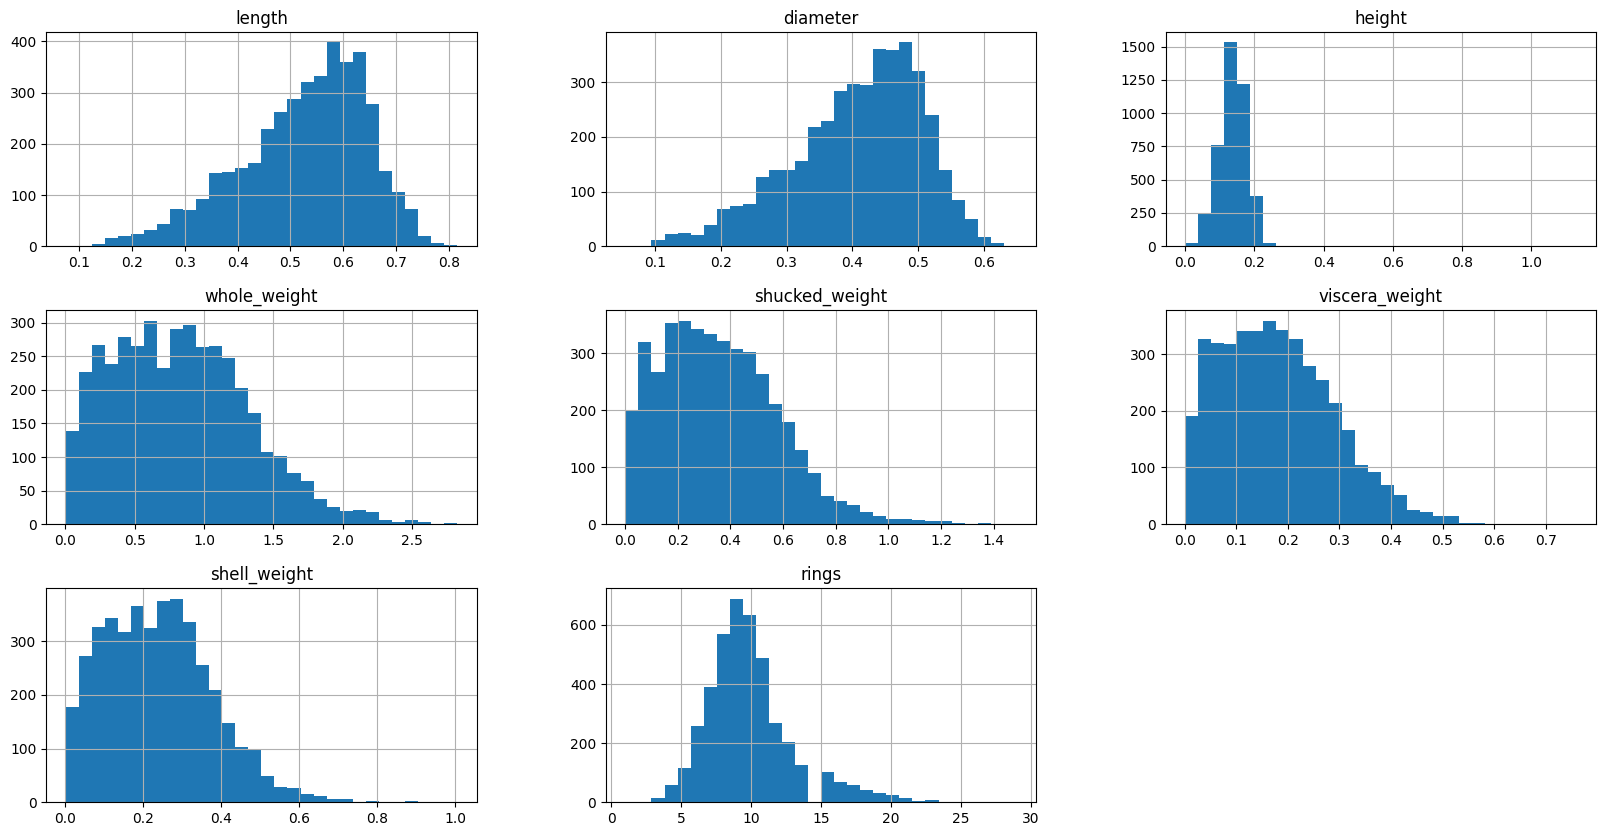

In [64]:
df.drop(columns=['sex']).hist(figsize=(20, 10), bins=30)
plt.show()

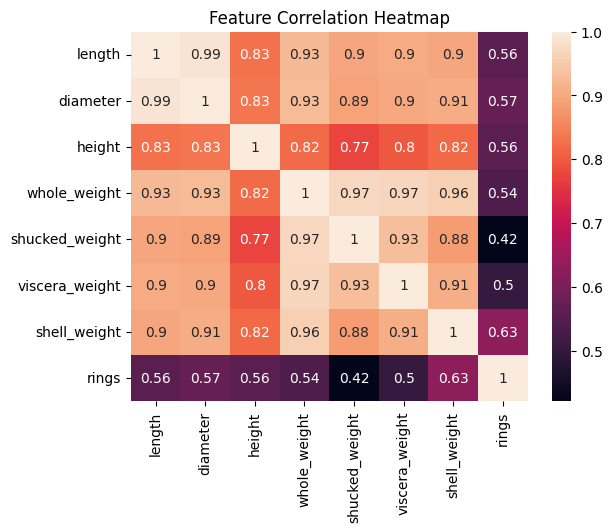

In [65]:
sns.heatmap(df.drop(columns=['sex']).corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [66]:
df.isnull().sum()

,0
sex,0
length,0
diameter,0
height,0
whole_weight,0
shucked_weight,0
viscera_weight,0
shell_weight,0
rings,0


In [53]:
df.duplicated().sum()

np.int64(0)

In [71]:
def bin_rings(rings):
  if rings < 6:
    return 1
  elif rings < 14:
    return 2
  else:
    return 3

df['rings'] = df['rings'].apply(bin_rings)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2


In [72]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex']),
        ('num', StandardScaler(), ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'])
    ],
)

df_preprocessing = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())
df_preprocessing['rings'] = df['rings']
df_preprocessing.head()

,cat__sex_F,cat__sex_I,cat__sex_M,num__length,num__diameter,num__height,num__whole_weight,num__shucked_weight,num__viscera_weight,num__shell_weight,rings
0,0.0,0.0,1.0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,3
1,0.0,0.0,1.0,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,2
2,1.0,0.0,0.0,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,2
3,0.0,0.0,1.0,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,2
4,0.0,1.0,0.0,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,2
